# Data cleaning and Exploration

### Data Overview:
The dataset used is from https://www.kaggle.com/datasets/regivm/retailtransactiondata

**The dataset contains** :
- *Retail_Data_Transaction:*
    - customer_id: Identifier for customers.
    - trans_date: Date of the transaction.
    - tran_amount: Amount of the transaction.
- *Retail_Data_Response*:
    - customer_id: Identifier for customers.
    - response: Customer's response (binary).


### Load & clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Set the style for seaborn
sns.set(style="whitegrid")

In [2]:
trxn=pd.read_csv(r'C:\Users\rupsa\Downloads\InternshipStudio Project Dataset\Retail_Data_Transactions.csv')
response = pd.read_csv(r'C:\Users\rupsa\Downloads\InternshipStudio Project Dataset\Retail_Data_Response.csv')

In [3]:
trxn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


Transaction data provides customer_id, transaction date and Amount of purchase.

In [4]:
response.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


Response data provides the response information of each of the customers. It is a binary variable indicating whether the customer responded to a campaign or not.

In [5]:
# Merging the two dataset
main_data=pd.merge(trxn,response,on="customer_id",how="left")
main_data.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [6]:
#Checking the datatype of each column
main_data.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

Here trans_date is object, but we need to convert it to datetime dataype to do further analysis, also response doesn't need to be a float variable, we can convert it to integer.

In [7]:
#Checking the shape of the dataframe
main_data.shape

(125000, 4)

In [8]:
#Display basic statistics for the main_data
main_data.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
# Lets check for null values
main_data.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

The response column has 31 null values which is 0.25% of the whole dataset,therefore, we can safely drop these null values.

In [10]:
#Droping null values
main_data=main_data.dropna()
main_data.shape

(124969, 4)

In [11]:
#Converting datatypes of trans_date and response
main_data['trans_date']=pd.to_datetime(main_data['trans_date'])
main_data['response']=main_data['response'].astype('int64')
main_data.head()

C:\Users\rupsa\AppData\Local\Temp\ipykernel_4184\3377641259.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_data['trans_date']=pd.to_datetime(main_data['trans_date'])


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0


<Axes: xlabel='response'>

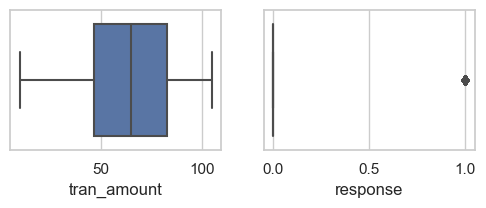

In [12]:
#Checking for outliers
plt.figure(figsize=(6,4))
#Box plot of transaction amounts
plt.subplot(2,2,1)
sns.boxplot(x=main_data['tran_amount'])
#Box plot of response
plt.subplot(2,2,2)
sns.boxplot(x=main_data['response'])

Both of them don't have any outliers.

### Creating Additional Dataset
##### which includes:
- customer_id: Identifier for customers.
- recency: Date of the most recent transaction.
- frequency: Number of transactions.
- monetary: Total amount spent.

In [13]:
# Calculate the recency, frequency, and monetary values
recency = main_data.groupby('customer_id')['trans_date'].max().reset_index()
recency.columns = ['customer_id', 'recency']

frequency = main_data.groupby('customer_id')['trans_date'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

monetary = main_data.groupby('customer_id')['tran_amount'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Merge the calculated values into a single dataframe
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Print the resulting dataframe
rfm.head()

,customer_id,recency,frequency,monetary
0,CS1112,2015-01-14,15,1012
1,CS1113,2015-02-09,20,1490
2,CS1114,2015-02-12,19,1432
3,CS1115,2015-03-05,22,1659
4,CS1116,2014-08-25,13,857


In [14]:
rfm.describe()

,recency,frequency,monetary
count,6884,6884.000000,6884.000000
mean,2014-12-25 23:24:01.255084288,18.153544,1179.892214
min,2013-05-07 00:00:00,4.000000,149.000000
25%,2014-11-25 00:00:00,14.000000,781.000000
50%,2015-01-22 00:00:00,18.000000,1228.000000
75%,2015-02-22 00:00:00,22.000000,1520.250000
max,2015-03-16 00:00:00,39.000000,2933.000000
std,NaN,5.184476,465.421365


### Descriptive Statistics and Visualization

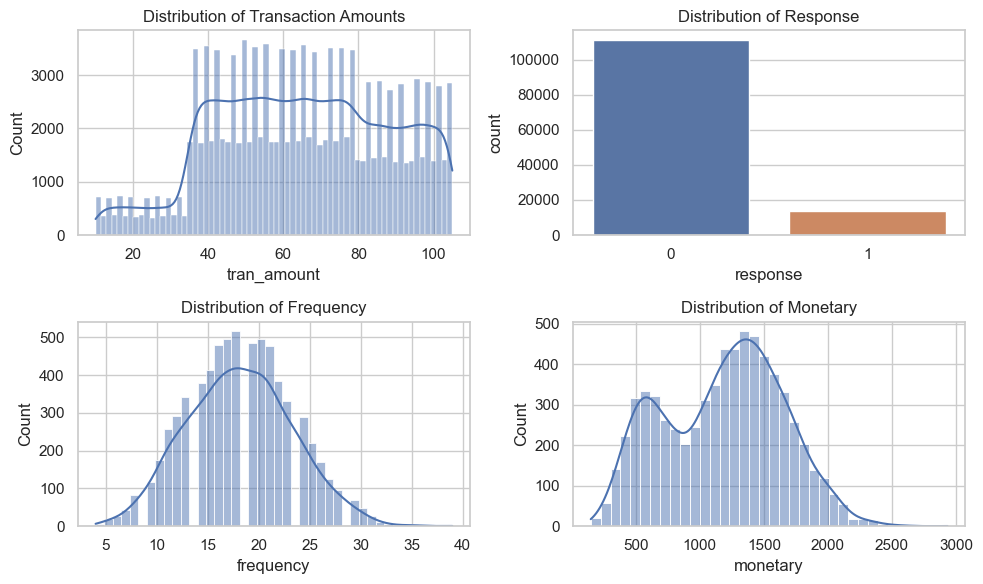

In [15]:
plt.figure(figsize=(10, 6))

# Distribution of transaction amounts
plt.subplot(2, 2, 1)
sns.histplot(main_data['tran_amount'], kde=True)
plt.title('Distribution of Transaction Amounts')

# Distribution of response
plt.subplot(2, 2, 2)
sns.countplot(x='response', data=main_data)
plt.title('Distribution of Response')

# Distribution of frequency
plt.subplot(2, 2, 3)
sns.histplot(rfm['frequency'], kde=True)
plt.title('Distribution of Frequency')

# Distribution of monetary
plt.subplot(2, 2, 4)
sns.histplot(rfm['monetary'], kde=True)
plt.title('Distribution of Monetary')
plt.tight_layout()
plt.show()

##### Key Insights:
- **Transaction Amounts:** Transactions commonly occur in the range of 40 to 100 units, indicating typical purchase sizes.
- **Customer Response:** No response is high. This suggests that most customers are not interested in the campaign.
- **Customer Frequency:** Most customers have a transaction frequency of around 20, suggesting that customers are fairly engaged with regular transactions.
- **Customer Spending:** The presence of two distinct peaks in spending suggests two main customer segments: high spenders and low spenders.

### Correlation Analysis

In [16]:
#let's first merge the two dataset
merged_data=pd.merge(main_data,rfm,on="customer_id",how='inner')

# Calculate recency as the number of days since the last transaction
latest_date = merged_data['trans_date'].max()
merged_data['recency'] = (latest_date - merged_data['trans_date']).dt.days

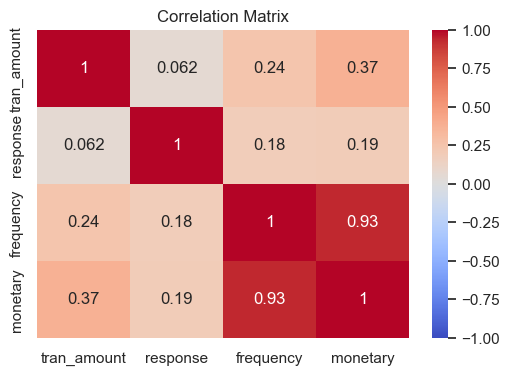

In [17]:
# Calculate the correlation matrix
correlation_matrix = merged_data[['tran_amount', 'response', 'frequency', 'monetary']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- **Weak Correlations:** *tran_amount* and *response*, *response* and *frequency*, *response* and *monetary*. These weak correlations indicate that individual transaction amounts and the binary response variable (likely indicating if there's a response or not ) do not have a strong linear relationship with the number of transactions or total spending.

- **Moderate Correlation:** *tran_amount* and *monetary*. This indicates that while there is some relationship between the amount of individual transactions and total spending, it is not very strong.

- **Strong Correlation:** *frequency* and *monetary*. This indicates a strong relationship between the number of transactions and total spending, which is logical because more transactions generally result in higher total spending.

### Customer Segmentation

In [18]:
# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(merged_data[['frequency', 'monetary']])
rfm_scaled


array([[ 1.06276831,  0.73812889],
       [ 1.06276831,  0.73812889],
       [ 1.06276831,  0.73812889],
       ...,
       [-2.89832533, -2.52774633],
       [-2.89832533, -2.52774633],
       [-2.89832533, -2.52774633]])

In [19]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)
merged_data['segment'] = kmeans.labels_

C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Rename clusters to P0, P1, P2
cluster_mapping = {0: 'P0', 1: 'P2', 2: 'P1'}
merged_data['segment'] = merged_data['segment'].map(cluster_mapping)
merged_data.head()

,customer_id,trans_date,tran_amount,response,recency,frequency,monetary,segment
0,CS5295,2013-02-11,35,1,763,25,1637,P0
1,CS5295,2014-11-25,54,1,111,25,1637,P0
2,CS5295,2013-05-22,37,1,663,25,1637,P0
3,CS5295,2012-12-24,36,1,812,25,1637,P0
4,CS5295,2013-03-22,98,1,724,25,1637,P0


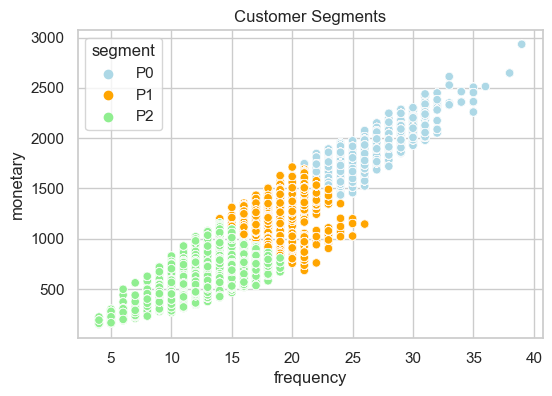

In [57]:
# Define custom colors for each segment
segment_colors = {'P0': 'lightblue', 'P1': 'orange', 'P2': 'lightgreen'}

# Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='frequency', y='monetary', hue='segment', data=merged_data,palette=segment_colors)
plt.title('Customer Segments')
plt.show()

- **P2 (Green):** This cluster represents customers with low purchase frequency (they buy infrequently) and low monetary value (they spend less per purchase). They likely make up the largest portion of the customer base based on the number of data points associated with them.
- **P1 (Orange):** This cluster includes customers with medium purchase frequency (they buy somewhat regularly) and medium monetary value (they spend a moderate amount per purchase). They likely represent a smaller segment compared to P1.
- **P0 (Blue):** This cluster consists of customers with high purchase frequency (they buy often) and high monetary value (they spend the most per purchase). They are likely the smallest segment in terms of customer count but potentially the most valuable for the retailer due to their high spending habits.

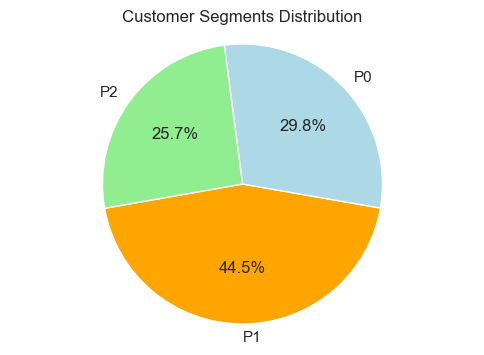

In [54]:
# Plotting the pie chart for each cluster
# Count the number of customers in each cluster
cluster_counts = merged_data['segment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=190, colors=[segment_colors[key] for key in cluster_counts.index])
plt.title('Customer Segments Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- **P1 (Largest):** This segment represents the majority of the customer base (44.5%). They exhibit medium purchase frequency and spend a moderate amount per transaction.
- **P0 (Second Largest):** This segment (29.8%) is the second largest. They are frequent shoppers with high spending habits, making them valuable customers.
- **P2 (Smallest):** This is the smallest segment (25.7%). They are infrequent shoppers who spend less per purchase.


### Time series analysis

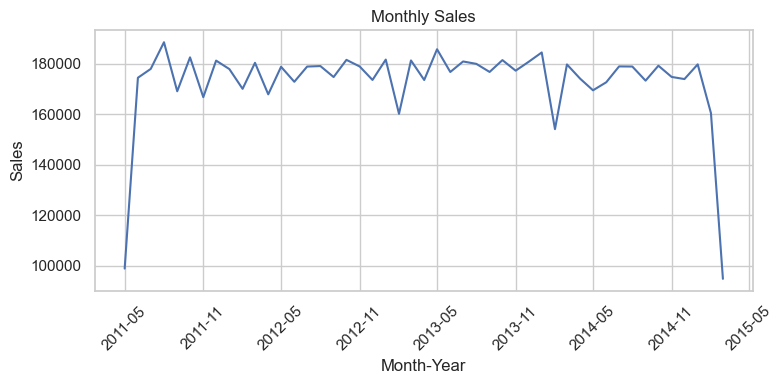

In [60]:
import matplotlib.dates as mdates
merged_data['month_year']=merged_data['trans_date'].dt.to_period('M')
monthly_sales =merged_data.groupby('month_year')['tran_amount'].sum()
monthly_sales.index=monthly_sales.index.to_timestamp()
plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. **Initial Growth and Stabilization**: Rapid sales increase until mid-2011, then stable between 160,000 and 180,000 units/month.

2. **Seasonal Fluctuations**: Regular ups and downs suggest seasonal effects on sales.

3. **Significant Anomalies**: Sharp declines in late 2013 and March 2015 indicate possible external disruptions.

### Customer Lifetime Value(CLV) Analysis

In [24]:
merged_data['Average_Order_Value'] = merged_data['monetary'] / merged_data['frequency']
merged_data.head()

,customer_id,trans_date,tran_amount,response,recency,frequency,monetary,segment,month_year,Average_Order_Value
0,CS5295,2013-02-11,35,1,763,25,1637,P0,2013-02,65.48
1,CS5295,2014-11-25,54,1,111,25,1637,P0,2014-11,65.48
2,CS5295,2013-05-22,37,1,663,25,1637,P0,2013-05,65.48
3,CS5295,2012-12-24,36,1,812,25,1637,P0,2012-12,65.48
4,CS5295,2013-03-22,98,1,724,25,1637,P0,2013-03,65.48


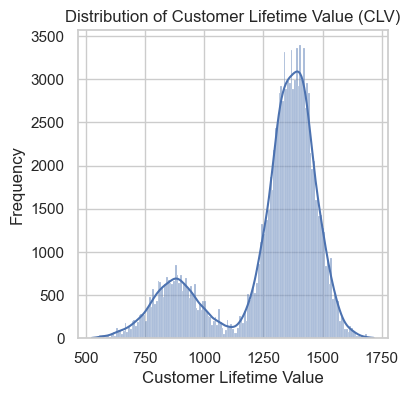

In [25]:
# Calculate average transaction value, purchase frequency, and churn rate
purchase_frequency = merged_data['frequency'].mean()

# Calculate CLV
merged_data['clv'] = merged_data['Average_Order_Value'] * purchase_frequency

# Plotting CLV distribution
plt.figure(figsize=(4, 4))
sns.histplot(merged_data['clv'], kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()


- **First Peak (Around 1000):** Indicates a segment of customers with lower CLV. These customers might be making fewer purchases, have a lower average order value, or have higher churn rates.
- **Second Peak (Around 1500):** Indicates a segment of customers with higher CLV. These customers likely have higher purchase frequency, higher average order value, or lower churn rates.

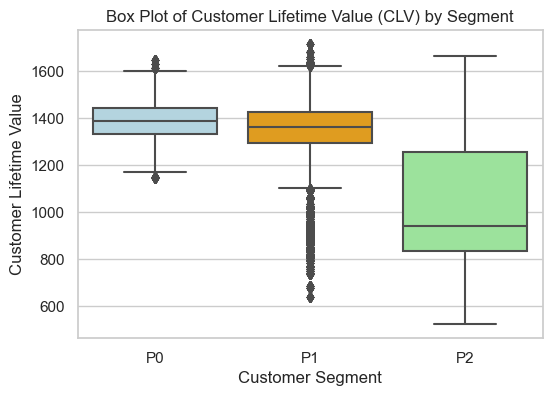

In [58]:
# Plotting the distribution of CLV within each segment using box plots
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_data, x='segment', y='clv', palette=segment_colors)
plt.title('Box Plot of Customer Lifetime Value (CLV) by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value')
plt.show()

- **P0 (Blue):** The most valuable segment with consistently high CLV. Focus on retaining and growing these customers.
- **P1 (Orange):** A valuable segment with medium CLV. Opportunities exist to increase the CLV by encouraging more frequent purchases or higher spending.
- **P2 (Green):** The least valuable segment with significant variability in CLV. Strategies might include targeted marketing to increase engagement and spending or identifying and nurturing high potential customers within this segment.

### Hypothesis Testing

##### Chi-Square Test for Independence
**Objective:** Test if there is a significant relationship between two categorical variables (e.g., segment and response).

- Null Hypothesis: Customer segment and response are independent.
- Alternative Hypothesis: Customer segment and response are not independent.

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table for segment and response
contingency_table = pd.crosstab(merged_data['segment'], merged_data['response'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')


Chi-Square Statistic: 3726.524508204434
P-value: 0.0


Since the p-value is significantly less than 0.05, we reject the null hypothesis. This means there is a significant relationship between customer segment and response, indicating that the response is dependent on the customer segment.

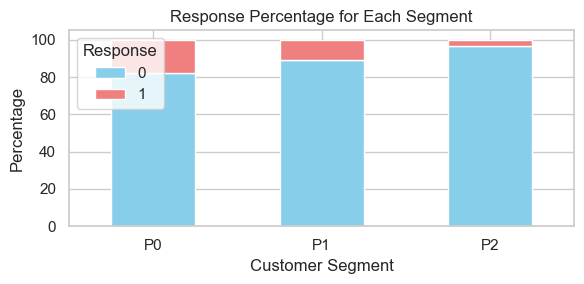

In [28]:
# Calculate the response counts and percentages for each segment
response_counts = merged_data.groupby(['segment', 'response']).size().unstack().fillna(0)
response_percentages = response_counts.div(response_counts.sum(axis=1), axis=0) * 100

# Plotting the response percentages
response_percentages.plot(kind='bar', stacked=True, figsize=(6, 3), color=['skyblue', 'lightcoral'])

plt.title('Response Percentage for Each Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.legend(title='Response', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

##### ANOVA (Analysis of Variance)
**Objective:** Compare the means of transaction amounts across different customer segments.

- Null Hypothesis (𝐻0):The mean transaction amounts for all customer segments are equal.
- Alternative Hypothesis (𝐻1): At least one customer segment has a different mean transaction amount.

In [29]:
from scipy.stats import f_oneway

# Group data by segments
groups = [merged_data[merged_data['segment'] == segment]['tran_amount'] for segment in merged_data['segment'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')



F-statistic: 7691.415753415275
P-value: 0.0


Since the p-value is significantly less than 0.05, we reject the null hypothesis. This means there is strong evidence that not all customer segments have the same mean transaction amount; at least one segment has a different mean transaction amount.

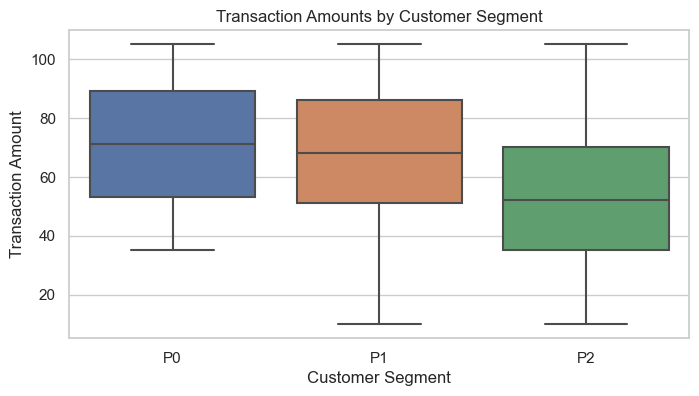

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='segment', y='tran_amount', data=merged_data)
plt.title('Transaction Amounts by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Transaction Amount')
plt.show()

### Conclusion

The analysis of the customer dataset revealed significant insights. Correlation analysis indicated a strong relationship between monetary value and transaction amount. Customer segmentation using K-means clustering identified three segments: high-value (P0), medium-value (P1), and low-value (P2). Linear regression showed frequency and monetary value as significant predictors of transaction amounts. Time series analysis revealed volatility in monthly sales. CLV analysis identified two customer segments with distinct CLV peaks. Hypothesis testing indicated significant differences in transaction amounts between responders and non-responders, a dependency between customer segment and response, and differing mean transaction amounts across segments. Recommendations include targeted marketing for high-value customers (P0) to boost retention, strategies to elevate medium-value customers (P1), and engagement efforts to increase spending among low-value customers (P2). Addressing sales volatility through consistent promotional activities and refining customer segmentation strategies can further enhance marketing effectiveness and customer engagement.

# Data Visualization

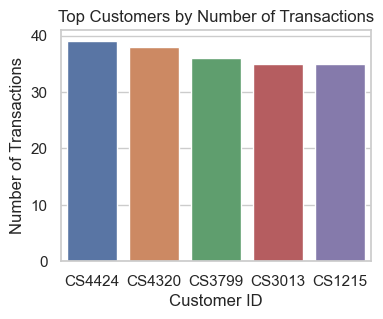

In [31]:
# Top Customers by Number of Transactions
top_customers_transactions = merged_data['customer_id'].value_counts().head(5)
plt.figure(figsize=(4, 3))
sns.barplot(x=top_customers_transactions.index, y=top_customers_transactions.values)
plt.title('Top Customers by Number of Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.show()


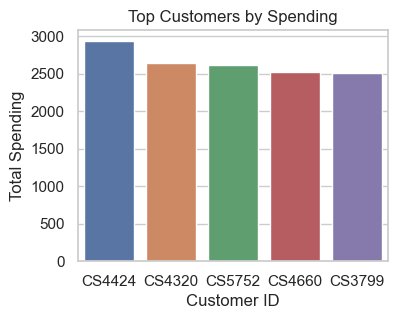

In [32]:
# Top Customers by Spending
top_customers_spending = merged_data.groupby('customer_id')['tran_amount'].sum().nlargest(5)
plt.figure(figsize=(4, 3))
sns.barplot(x=top_customers_spending.index, y=top_customers_spending.values)
plt.title('Top Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

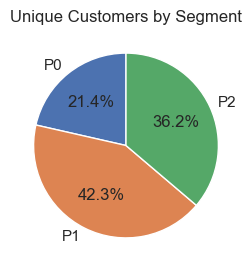

In [46]:
# Unique Customers by Segment
unique_customers_by_segment = merged_data.groupby('segment')['customer_id'].nunique()
plt.figure(figsize=(4,3))
unique_customers_by_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Unique Customers by Segment')
plt.ylabel('')
plt.show()

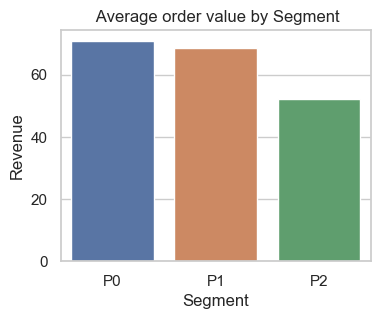

In [61]:
# Revenue Contribution by Segment
revenue_by_segment = merged_data.groupby('segment')['tran_amount'].mean()
plt.figure(figsize=(4,3))
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values)
plt.title(' Average order value by Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.show()

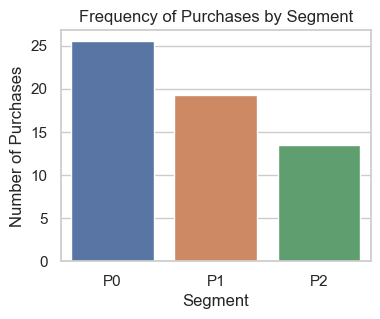

In [43]:
# Frequency of Purchases by Segment
frequency_by_segment = merged_data.groupby('segment')['frequency'].mean()
plt.figure(figsize=(4,3))
sns.barplot(x=frequency_by_segment.index, y=frequency_by_segment.values)
plt.title('Frequency of Purchases by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.show()


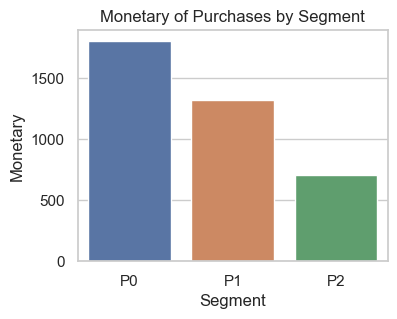

In [44]:
# Monetary by Segment
monetary_by_segment = merged_data.groupby('segment')['monetary'].mean()
plt.figure(figsize=(4,3))
sns.barplot(x=monetary_by_segment.index, y=monetary_by_segment.values)
plt.title('Monetary of Purchases by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.show()

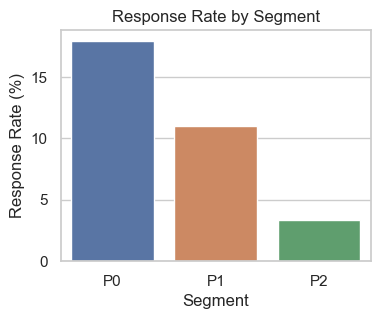

In [45]:
# Response Rate by Segment
response_rate_by_segment = merged_data.groupby('segment')['response'].mean() * 100
plt.figure(figsize=(4,3))
sns.barplot(x=response_rate_by_segment.index, y=response_rate_by_segment.values)
plt.title('Response Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Response Rate (%)')
plt.show()

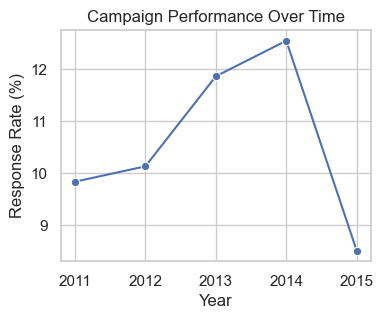

In [40]:
# Campaign Performance Over Time
campaign_performance = merged_data.groupby('year')['response'].mean() * 100
plt.figure(figsize=(4,3))
sns.lineplot(x=campaign_performance.index, y=campaign_performance.values, marker='o')
plt.title('Campaign Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Response Rate (%)')
plt.show()

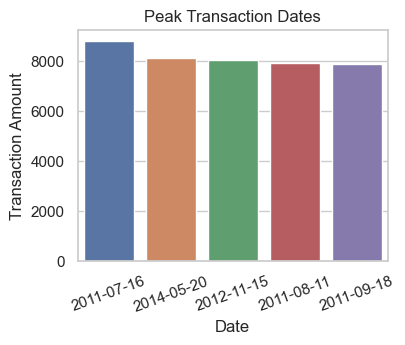

In [33]:
# Peak Transaction Dates
peak_dates = merged_data.groupby(merged_data['trans_date'].dt.date)['tran_amount'].sum().nlargest(5)
plt.figure(figsize=(4,3))
sns.barplot(x=peak_dates.index, y=peak_dates.values)
plt.title('Peak Transaction Dates')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=20)
plt.show()

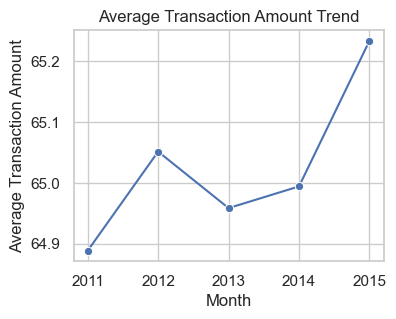

In [62]:
# Average Transaction Amount Trend
monthly_avg_transaction = merged_data.groupby('year')['tran_amount'].mean()
plt.figure(figsize=(4,3))
sns.lineplot(x=monthly_avg_transaction.index, y=monthly_avg_transaction.values, marker='o')
plt.title('Average Transaction Amount Trend')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.show()

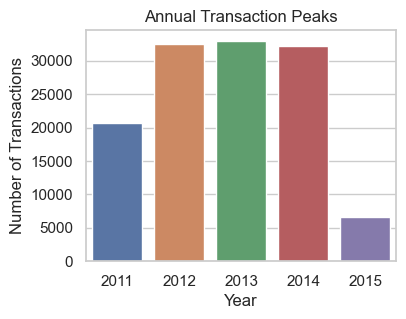

In [34]:
# Annual Transaction Peaks
merged_data['year'] = pd.to_datetime(merged_data['trans_date']).dt.year
annual_transactions = merged_data['year'].value_counts()
plt.figure(figsize=(4,3))
sns.barplot(x=annual_transactions.index, y=annual_transactions.values)
plt.title('Annual Transaction Peaks')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


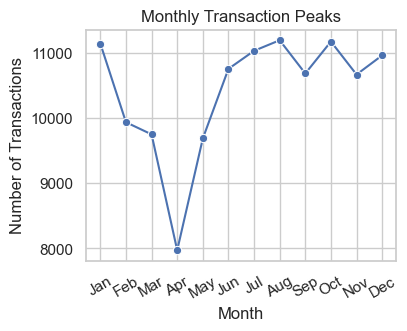

In [35]:
merged_data['month'] = merged_data['trans_date'].dt.month

# Create a mapping of month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Map month numbers to month names
monthly_transactions = merged_data['month'].value_counts().sort_index()
monthly_transactions.index = monthly_transactions.index.map(month_names)

plt.figure(figsize=(4, 3))
sns.lineplot(x=monthly_transactions.index, y=monthly_transactions.values, marker='o')
plt.title('Monthly Transaction Peaks')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=30)
plt.show()

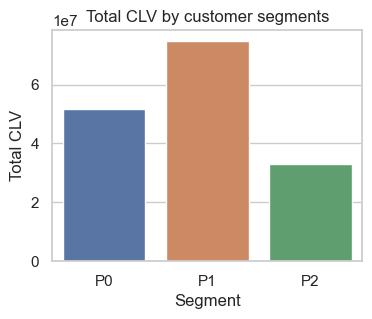

In [38]:
# Customer Segments  Total CLV
segment_response = merged_data.groupby('segment')['clv'].sum()
plt.figure(figsize=(4,3))
sns.barplot(x=segment_response.index, y=segment_response.values)
plt.title('Total CLV by customer segments')
plt.xlabel('Segment')
plt.ylabel('Total CLV')
plt.show()

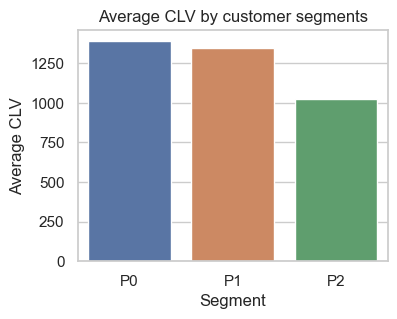

In [39]:
# Customer Segments  Average CLV
segment_response = merged_data.groupby('segment')['clv'].mean()
plt.figure(figsize=(4,3))
sns.barplot(x=segment_response.index, y=segment_response.values)
plt.title('Average CLV by customer segments')
plt.xlabel('Segment')
plt.ylabel('Average CLV')
plt.show()

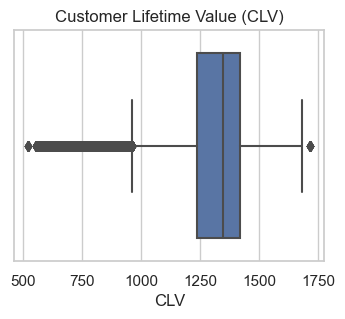

In [63]:
# Customer Lifetime Value (CLV)
clv = merged_data['clv']
plt.figure(figsize=(4,3))
sns.boxplot(x=clv)
plt.title('Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.show()